# Notebook 3 - Regresión Polinomial

*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1. Abrimos el dataset.

Hoy, a diferencia de los días anteriores, vamos a cargar nuestros datos desde un archivo subido desde el ordenador, que será la manera más habitual de hacerlo en nuestro día a día. Para eso tendremos que desplegar el menú de la izquierda del Google Colab y en la pestaña *Archivos* clickar en el botón *Subir* para cargar archivos desde tu ordenador. Los archivos cargados tendrán que ser resubidos tras 24 horas, cuando Google nos reinicie la máquina virtual que soporta este Notebook.

Cargaremos el fichero *insurance.csv* proporcionado a través de Slack. Este archivo presenta un serie temporal que supondremos haber exportado de una de las tablas de la base de datos de nuestra empresa, donde sólo tendremos dos variables: ***Year***, el año al que hace referencia la variable y ***Av_claims***, la media de partes mensuales.

---

** Tu tarea **

1. Cargar el archivo *insurance.csv* en una matriz de datos. Para esto te vendrá bien conocer la función ***np.genfromtxt()*** de la librería ***Numpy***. Dejo de tu mano mirar la documentación para ver qué atributos utilizar para cargar correctamente tus datos. Otra opción diferente es utilizar las funcionalidades de carga de datos incluidas en la librería ***Pandas***

2. Genera una gráfica donde se vea representada la evolución de ***Av_claims*** con el paso de los años. Utiliza la función ***plt.plot()*** que ya conocemos, e investiga tipos de lineas, color y tipo de marcadores (*markers*) que te ofrece la función para que la gráfica tenga el siguiente estilo:

> > > > > > > ![texto alternativo](https://www.math.ubc.ca/~pwalls/math-python/img/scipy/matplotlib_10_0.png) 

3.  Realiza un modelo de ***Regresión Lineal Simple*** en la serie temporal (puedes elegir implementar tu mismo la regresión o usar la librería ***Sklearn***) para encontrar la línea recta que mejor se ajuste a los datos. Una vez tengan el modelo entrenado, visualiza la recta y comprueba qué tal se ajusta a los datos.

4. (Bonus) Hemos insistido en que el ajuste del modelo de ***Regresión Lineal Simple*** te proporciona el valor de los parámetros cuyo valor minimiza la función del ***Error Cuadrático Medio***. Pero... ¿Y por qué creertelo cuándo ya conoces las herramientas para poder comprobarlo tu mismo? Crea una gráfica donde en el eje X se representen diferentes valores de uno de los dos parámetros (elige entre $w_0$ o $w_1$), y en el eje Y el error obtenido a través de la función de coste, cuando variamos el valor del parámetro que hemos graficado en el eje X (el valor del otro parámetro, el que no has elegido para graficar en el eje X, siempre deberá de tener un valor fijo igual al obtenido en el método de Mínimos Cuadrados Ordinarios del punto 3). Esto debería de generarte una curva parabólica cuyo punto mínimo, el mínimo del error, se produce cuando el parámetro en el eje X es igual al valor obtenido en el punto 3.

**Hint:** Recuerda que para calcular la regresión lineal simplemente tienes que evaluar la expresión siguiente:


> > > > >  > > > $W = (X^TX)^{-1}X^TY$



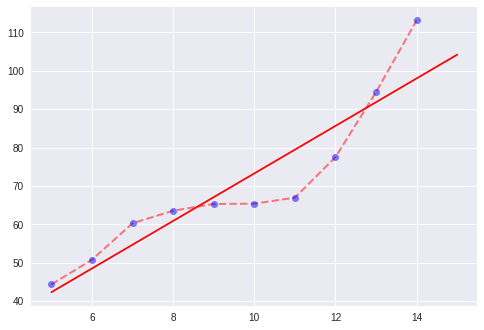

---
[215114.7829584228, 205878.37381649858, 196846.02548469565, 188017.7379630142, 179393.51125145413, 170973.34535001547, 162757.24025869826, 154745.19597750247, 146937.21250642807, 139333.2898454751, 131933.4279946435, 124737.62695393345, 117745.88672334468, 110958.20730287739, 104374.58869253151, 97995.03089230701, 91819.53390220394, 85848.09772222232, 80080.72235236206, 74517.40779262326, 69158.15404300585, 64002.96110350988, 59051.82897413533, 54304.75765488217, 49761.74714575046, 45422.79744674013, 41287.90855785124, 37357.08047908375, 33630.313210437685, 30107.606751913034, 26788.9611035098, 23674.376265227977, 20763.85223706758, 18057.38901902859, 15554.98661111102, 13256.645013314868, 11162.364225640127, 9272.144248086806, 7585.9850806549, 6103.88672334441, 4825.849176155339, 3751.8724390876882, 2881.9565121414453, 2216.1013953166207, 1754.307088613212, 1496.5735920312197, 1442.9009055706438, 1593.2890292314835, 1947.7379630137405, 2506.2477069174133, 3268.818260942502, 4235.4

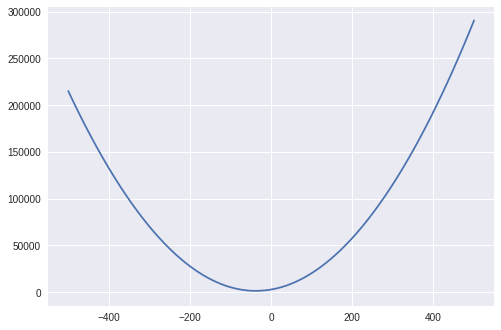

In [0]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from numpy   import genfromtxt

# COMIENZA AQUÍ TU CÓDIGO #

# Cargamos el archivo de datos, delimitado por comas, y obviando la cabecera.
data = genfromtxt("./insurance.csv", delimiter=",", skip_header=True)

n, p = data.shape

# Generamos nuestras matrices X e Y.
X = data[:,0:1]
Y = data[:,1:2]

plt.plot(data[:, 0], data[:, 1], color='red',linestyle='dashed',linewidth=2,
                                 marker='o',markersize=7,markerfacecolor='blue',
                                 markeredgecolor='blue', alpha=0.5)

# Ampliamos X con un vector columna de 1s.
aX = np.hstack((np.ones((n,1)), X))

# Calculamos la regresión lineal 
# por Mínimos Cuadrados Ordinarios.
W = np.linalg.inv(aX.T @ aX) @ aX.T @ Y

# Y generamos las predicciones de los puntos de
# la recta.
_X = np.array([[1, 5], [1, 15]])
_Y = _X @ W

plt.plot(_X[:,1], _Y, c="red")
plt.show()

print("---")

_x = np.linspace(-500, 500, 100)

# Calculamos un vector de Errores Cuadráticos Medios.
mse = [np.square(aX @ np.array([w1, W[0,0]]) - Y).mean() for w1 in _x]

print(mse)

plt.plot(_x, mse)
plt.plot([W[0],W[0]], [0, 50])
print(W[1])

## 2. Regresión polinomial.

Parece que el modelo de Regresión Lineal Simple, tal cuál lo hemos planteado, no consigue capturar por completo la relación entre ambas variables. Por suerte, ya sabemos que podemos añadir una mayor flexibilidad al modelo haciendo uso de la magia de los polinomios! 

---

**Tarea:**

1. Implementa una función que tome como parámetro de entrada la matriz $X$ y un número entero que represente el **grado** del polinomio. La tarea de dicha función será la de crear una matriz de salida, cuyas columnas sean cada una de las columnas de la matriz original, elevadas a todas las potencias existentes entre 0 y el número especificado por el parámetro **grado**. Por ejemplo, si la matriz de entrada es la siguiente:

> > > > > > $
  X=
  \left[ {\begin{array}{cc}
   x_{11} & x_{12}\\
   x_{21} & x_{22}\\
  \end{array} } \right]
$

y el grado especificado es 3, entonces la matriz generada será:

> > > > > > $
  X=
  \left[ {\begin{array}{cc}
   1 & x_{11}  & x_{12} & x_{11}^2 & x_{12}^2 & x_{11}^3 & x_{12}^3 \\
   1 & x_{21} & x_{22} & x_{21}^2 & x_{22}^2 & x_{21}^3 & x_{22}^3 \\
  \end{array} } \right]
$

2. Una vez tengas esta función implementada, utilizala para procesar la matriz $X$ con los siguientes grados $g = [1, 2, 3, 4, 5, 6]$, y ajusta el modelo para cada una de estas matrices. Conjuntamente grafica cada una de las lineas de regresión obtenidas, así como calcula el ***Error Cuadrático Medio*** para estos modelos. Para realizar estas gráficas, investiga la función **matplotlib.pyplot.subplots** para distribuir todas las gráficas en tres filas con dos gráficas en cada una.

In [0]:
def poly_matrix(X, grad):

  n, p = X.shape

  # Columna de 1s.
  Xt = np.ones((n,1))
  
  # Unimos la matriz X elevada a 
  # la potencia correspondiente.
  
  for i in range(p):
    for g in range(grad):
      Xt = np.hstack((Xt, np.power(X[:,i:i+1], g+1)))
      
  return Xt

Grado: 1 ECM: 57.04720206060608
Grado: 2 ECM: 31.607381984848463
Grado: 3 ECM: 2.935640696969643
Grado: 4 ECM: 2.8754511829836122
Grado: 5 ECM: 0.23210655478053846
Grado: 6 ECM: 0.2180263187957247


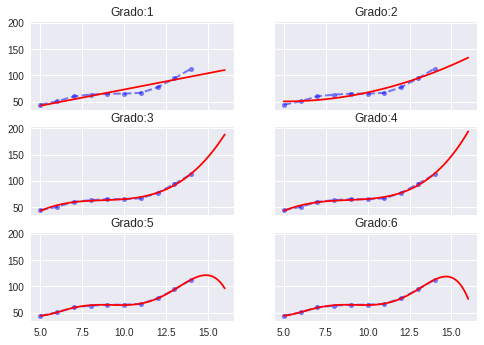

In [0]:
fig, axes = plt.subplots(3, 2, sharex='all', sharey='all')

for gr in range(1,7):

  aX = poly_matrix(X, gr)

  # Calculamos la regresión lineal 
  # por Mínimos Cuadrados Ordinarios.
  W = np.linalg.inv(aX.T @ aX) @ aX.T @ Y

  
  _X = np.linspace(np.min(data[:,0]), 16, 100)[:, np.newaxis]

  axs0 = [0, 0, 1, 1, 2, 2]
  axs1 = [0, 1, 0, 1, 0, 1]
  
  axes[axs0[gr-1], axs1[gr-1]].plot(data[:, 0], data[:, 1], color='blue',linestyle='dashed',linewidth=2,
                                                            marker='o',markersize=5,markerfacecolor='blue',
                                                            markeredgecolor='blue', alpha=0.5)

  axes[axs0[gr-1], axs1[gr-1]].set_title("Grado:"+str(gr))
  axes[axs0[gr-1], axs1[gr-1]].plot(_X, poly_matrix(_X, gr) @ W, c="red")
  
  ECM = lambda Yp, Y: np.mean(np.power(Yp - Y, 2))
  
  print("Grado:", gr,"ECM:", ECM(poly_matrix(X, gr) @ W, Y))

## 3. Regresión Polinomial - Sklearn.

---
**Tarea** : Como ya va siendo costumbre en estos ejercicios y también en casos reales, la primera vez implementamos, pero ya a la segunda: reutilizamos. Vamos a repetir el mismo análisis de **Regresión Polinomial** que hemos realizado en el ejercicio anterior, pero en esta ocasión haciendo uso de la función ***sklearn.preprocessing.PolynomialFeatures()*** de la librería ***Sklearn***. Recuerda que en este caso Sklearn transforma tu matriz $X$ para añadir coeficientes polinomiales **y también sus interacciones**, cosa que no hemos incluido en el ejercicio anterior. Por esto mismo, es de esperar que los resultados no sean iguales (por ejemplo el*** Error Cuadrático Medio***), pero no te preocupes, la calidad del análisis debe ser igual o mejor. Visualiza los modelos entrenados para cada grado de la misma forma que hicimos en el ejercicio previo (reutiliza el código).


Grado: 1 ECM: 57.04720206060608
Grado: 2 ECM: 31.60738198484851
Grado: 3 ECM: 2.9356406969697972
Grado: 4 ECM: 2.875451182983812
Grado: 5 ECM: 0.2321065547791147
Grado: 6 ECM: 0.21802631235457598


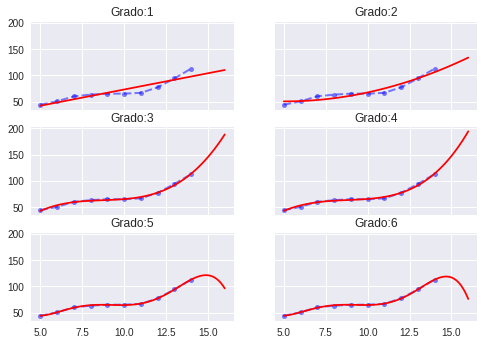

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

fig, axes = plt.subplots(3, 2, sharex='all', sharey='all')

for gr in range(1,7):

  poly = PolynomialFeatures(gr)
  
  # Transformamos polinomialmente a X.
  aX = poly.fit_transform(X)
  
  # Entrenamos el modelo de Regresión Lineal Multiple
  # con las variables polinomiales.
  lreg = LinearRegression(fit_intercept=False)
  lreg.fit(aX, Y)
  
  # Generamos matriz W y reutilizamos
  # el código del ej. anterior.
  W = np.array(lreg.coef_).T
  
  _X = np.linspace(np.min(data[:,0]), 16, 100)[:, np.newaxis]

  axs0 = [0, 0, 1, 1, 2, 2]
  axs1 = [0, 1, 0, 1, 0, 1]
  
  axes[axs0[gr-1], axs1[gr-1]].plot(data[:, 0], data[:, 1], color='blue',linestyle='dashed',linewidth=2,
                                                            marker='o',markersize=5,markerfacecolor='blue',
                                                            markeredgecolor='blue', alpha=0.5)

  axes[axs0[gr-1], axs1[gr-1]].set_title("Grado:"+str(gr))
  axes[axs0[gr-1], axs1[gr-1]].plot(_X, poly_matrix(_X, gr) @ W, c="red")
  
  ECM = lambda Yp, Y: np.mean(np.power(Yp - Y, 2))
  
  print("Grado:", gr,"ECM:", ECM(poly_matrix(X, gr) @ W, Y))